In [3]:
%load_ext autoreload
%autoreload 2
import datajoint as dj
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys

Connecting hanhou@datajoint.mesoscale-activity-map.org:3306


# Migrate my previous code

## Define models

In [ ]:
dj.ERD(foraging_model)

In [ ]:
foraging_model.ModelClass()

In [ ]:
foraging_model.Model.load_models()

In [ ]:
foraging_model.Model & 'is_choice_kernel'

In [ ]:
foraging_model.Model() * foraging_model.Model.Param() & 'model_id=0'

In [ ]:
foraging_model.FittedSessionModel.key_source

## Prepare data for each session

In [ ]:
dj.ERD(experiment.BehaviorTrial) +2

In [ ]:
dj.ERD(experiment.WaterPort)+1 + dj.ERD(experiment.SessionBlock) 

In [ ]:
key = {'subject_id': 447921, 'session': 3, 'model_id': 5}
experiment.WaterPortChoice.proj(choice='water_port') * experiment.BehaviorTrial.proj('outcome', 'early_lick') * \
experiment.SessionBlock.BlockTrial & key

## Populate model fitting

In [4]:
schema = dj.schema(get_schema_name('foraging_model'))
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [ ]:
schema.jobs.fetch('key', 'host')

In [ ]:
schema.jobs.delete()

In [7]:
finished = len(foraging_model.FittedSessionModel())
total = len(foraging_model.FittedSessionModel.key_source)
print(f'Fitted session: {finished}/{total}, {finished/total:.2%}')

Fitted session: 11672/19030, 61.33%


In [ ]:
foraging_model.FittedSessionModel()

Overall statistics for all models

In [ ]:
foraging_model.Model.proj('model_notation') * (foraging_model.Model.aggr(foraging_model.FittedSessionModel, aver_lpt_aic='avg(lpt_aic)', aver_lpt_bic='avg(lpt_bic)', n='count(*)'))

In [ ]:
dj.U('subject_id','session').aggr(foraging_model.FittedSessionModel, max_lpt_aic='max(lpt_aic)')

# Model comparison

In [22]:
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice, _get_model_comparison_results

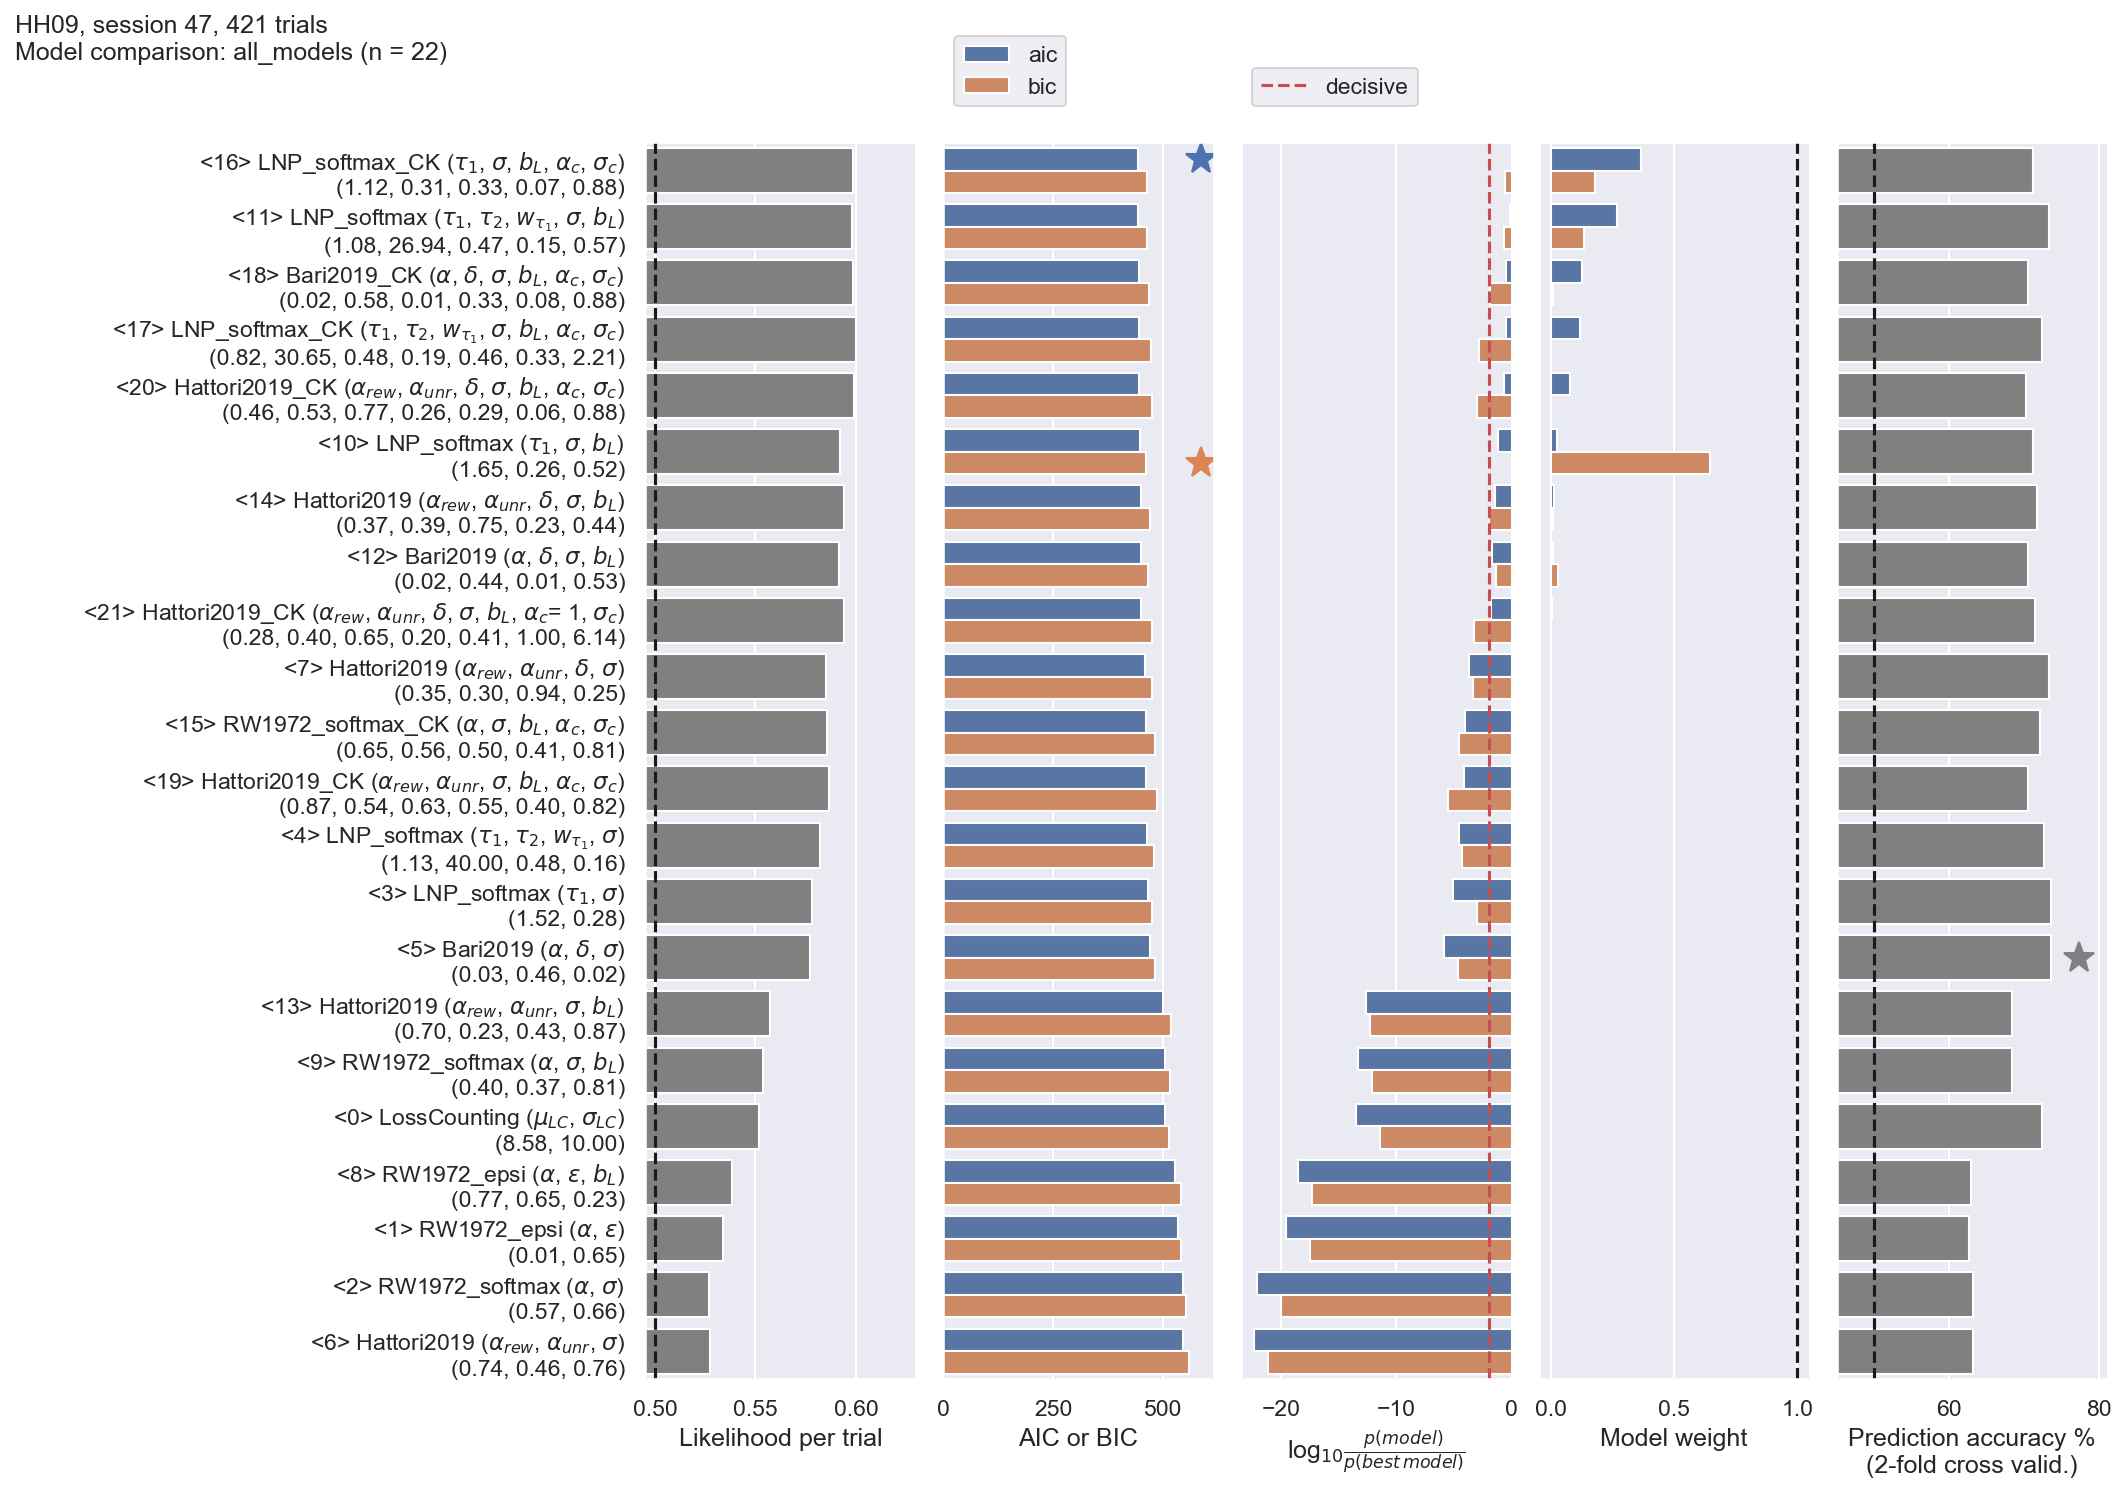

In [19]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")
plot_session_model_comparison(unit_key, model_comparison_idx=0, sort='aic')

In [ ]:
a,_ = _get_model_comparison_results({'subject_id': 473361, 'session': 47}, sort='aic')
a

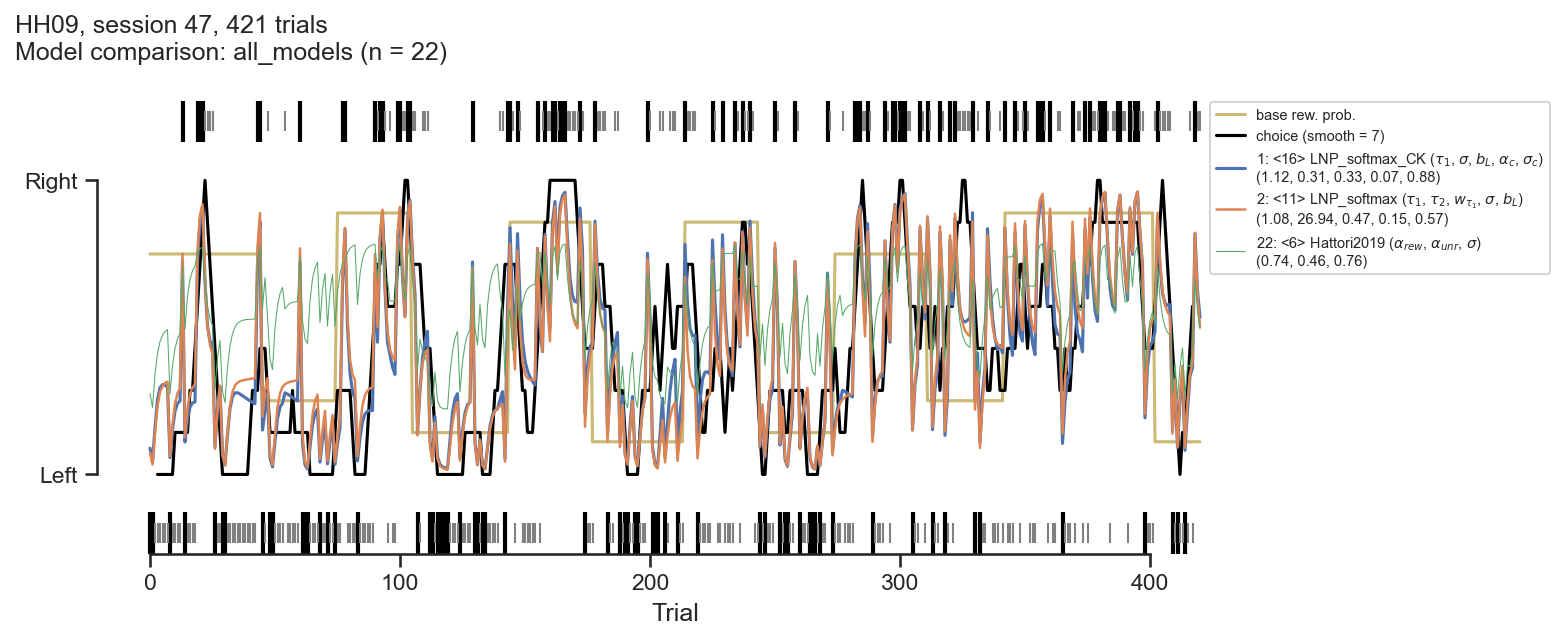

In [39]:
plot_session_fitted_choice(unit_key, first_n=2, last_n=1, smooth_factor=7)